In [1]:
import numpy as np
from scipy import ndimage
from skimage import io, morphology, filters, segmentation, measure, color
from matplotlib import pyplot as plt, patches
%matplotlib inline

In [2]:
imageFilename = "./test-images/rut_1.png"

In [3]:
image=io.imread(imageFilename)

# Original Image

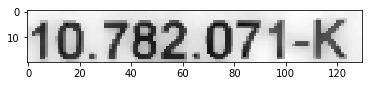

In [4]:
plt.imshow(image,cmap='gray')
plt.show()

# Apply Threshold

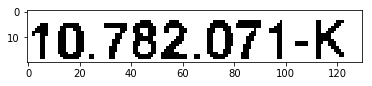

In [5]:
th=filters.threshold_otsu(image*0.95)
im_bin = image > th
plt.imshow(im_bin, cmap='gray')
plt.show()

# Get image labels and regions

In [6]:
mlabels, nlabels = morphology.label(1-im_bin, connectivity=1, return_num=True)
regions = measure.regionprops(mlabels)

# Draw rectangles around regions

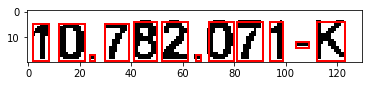

In [7]:
fig, ax = plt.subplots()
ax.imshow(im_bin,cmap='gray')

for i in range(nlabels):
    x, y, w, h = regions[i].bbox
    rect = patches.Rectangle((y, x), h - y, w - x,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
plt.show()

# Getting region Area

In [21]:
def getSliceTupleArea(sliceTuple):
    return (sliceTuple[0].stop - sliceTuple[0].start) * (sliceTuple[1].stop - sliceTuple[1].start)

# Testing region areas

In [34]:
roiList = []
for i in range(1, nlabels + 1):
    px, py = ndimage.find_objects(mlabels==i)[0]
    roiList.append((px,py))
    
sortedRoi = sorted(roiList, key= lambda x: x[1])

for i in range(len(sortedRoi)):
    print("region", i, "=", getSliceTupleArea(sortedRoi[i]))


region 0 = 84
region 1 = 140
region 2 = 4
region 3 = 126
region 4 = 135
region 5 = 150
region 6 = 4
region 7 = 150
region 8 = 150
region 9 = 75
region 10 = 10
region 11 = 165


# Ploting individually

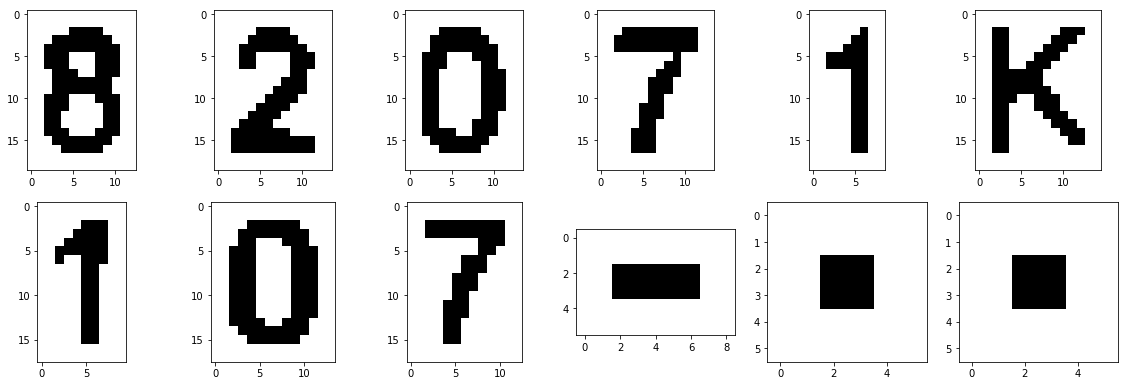

In [11]:
plt.figure(figsize=(20,10))
columns = 6
for i in range(1, nlabels + 1):
    px, py = ndimage.find_objects(mlabels==i)[0]
    roi = im_bin[px, py]
    roi = np.pad(roi, 2, mode='constant', constant_values=1)
    plt.subplot(nlabels / columns + 1, columns, i)
    plt.imshow(roi, cmap="gray")

# Sorting

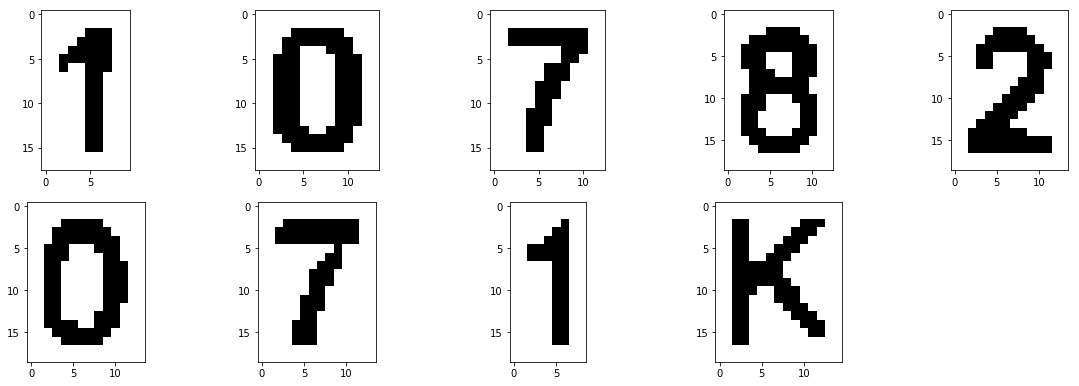

In [31]:
plt.figure(figsize=(20,10))
columns = 5
i = 0
for j in range(nlabels):
    (px, py) = sortedRoi[j]
    if(getSliceTupleArea((px,py))>10):
        roi = im_bin[px, py]
        roi = np.pad(roi, 2, mode='constant', constant_values=1)
        plt.subplot(nlabels / columns + 1, columns, i+1)
        plt.imshow(roi, cmap="gray")
        i = i + 1

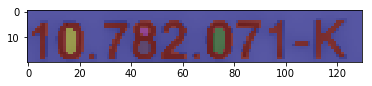

In [17]:
# label image regions
label_image = measure.label(im_bin)
image_label_overlay = color.label2rgb(label_image, image=image)
plt.imshow(image_label_overlay,cmap='gray')
plt.show()

In [14]:
for region in measure.regionprops(label_image):
    print(region)

NameError: name 'mpatches' is not defined

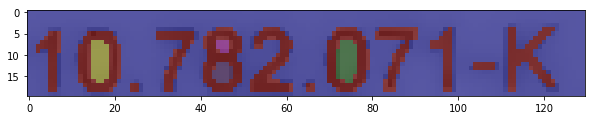

In [15]:
# label image regions
label_image = measure.label(im_bin)
image_label_overlay = color.label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in measure.regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)